In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [75]:
df = pd.read_csv("D:\jupyter\Deposit\currencywise.csv")

In [76]:
df.columns

Index(['categ_name', 'ac_group', 'ccy', 'group', 'TOTAL_AMOUNT', 'BANK_DATE',
       'INT_RATE', 'diffs', 'groupwise_total', 'categwise_total',
       'datewise_total'],
      dtype='object')

In [77]:
df.group.unique()

array(['FIXED DEPOSIT', 'SAVING DEPOSIT', 'BLB DEPOSIT', 'CALL DEPOSIT',
       'CURRENT', 'MARGIN DEPOSIT '], dtype=object)

In [78]:
sd = df[(df.group == 'SAVING DEPOSIT') & (df.ccy == "NPR")]

In [79]:
sd_initial = sd.drop(columns =['INT_RATE','group','categ_name','ac_group','ccy','TOTAL_AMOUNT','diffs','categwise_total','datewise_total'],axis=1)

In [80]:
sd_initial.BANK_DATE = pd.to_datetime(sd_initial.BANK_DATE,infer_datetime_format = True)

In [81]:
sd_initial.dtypes

BANK_DATE          datetime64[ns]
groupwise_total             int64
dtype: object

In [82]:
sd_initial.drop_duplicates(["BANK_DATE"],inplace = True)

In [83]:
sd_initial.set_index("BANK_DATE",inplace = True)

In [84]:
sd_initial.index

DatetimeIndex(['2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
               '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10',
               '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26',
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01'],
              dtype='datetime64[ns]', name='BANK_DATE', freq=None)

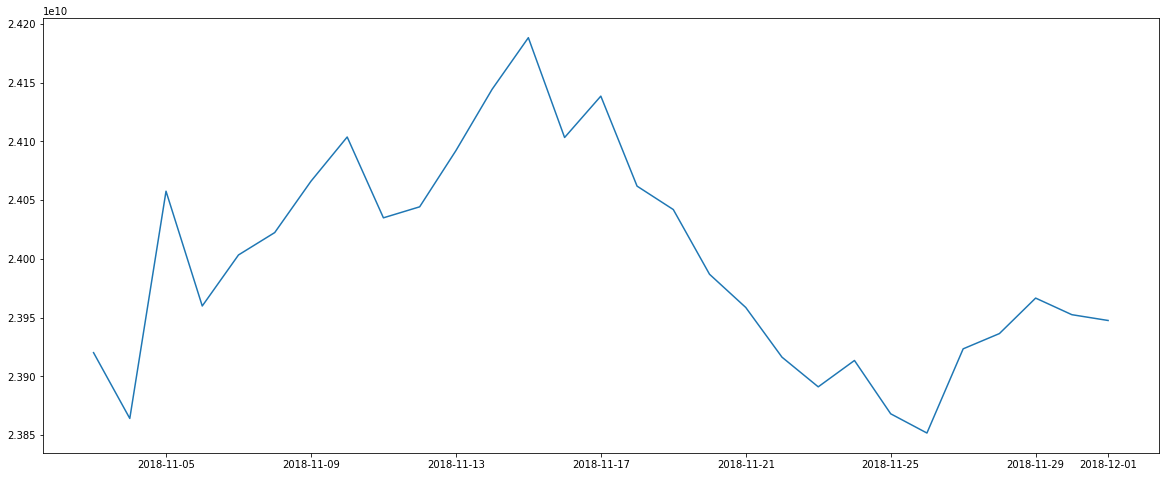

In [85]:
plt.plot(sd_initial.groupwise_total)
plt.show()
# plt.gcf().clear()

In [86]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['groupwise_total'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

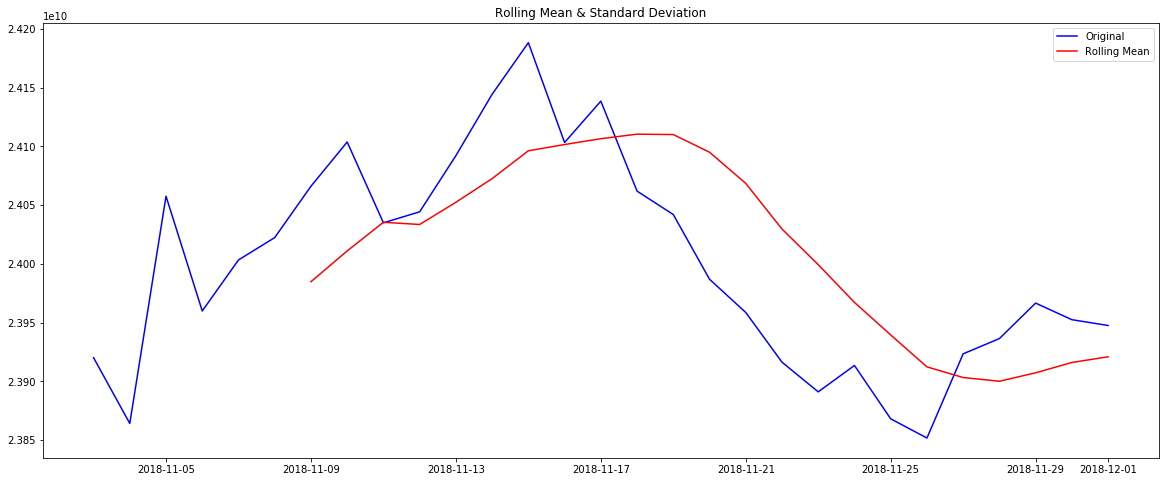

Results of Dickey-Fuller Test:
Test Statistic                 -1.833152
p-value                         0.364131
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [87]:
test_stationarity(sd_initial)

We can clearly see that the dataset is not sationary through plot also dicky fulller test shows that p value is more than 10%

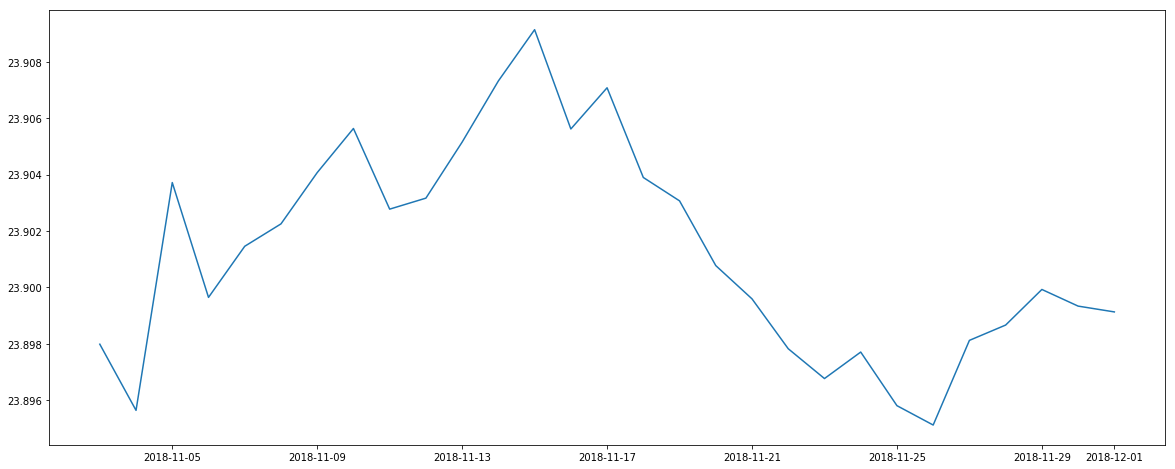

In [88]:
#taking log 
sd_log = np.log(sd_initial)
plt.plot(sd_log)

d:\python_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


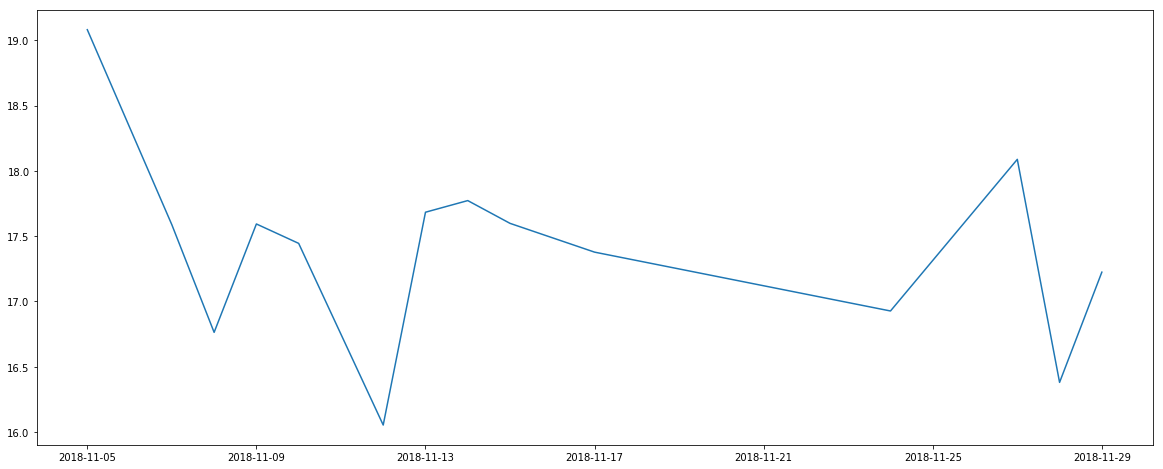

In [89]:
#Make stationary
sd_log_diff = np.log(sd_initial.diff())
sd_log_diff.dropna(inplace = True)
plt.plot(sd_log_diff)

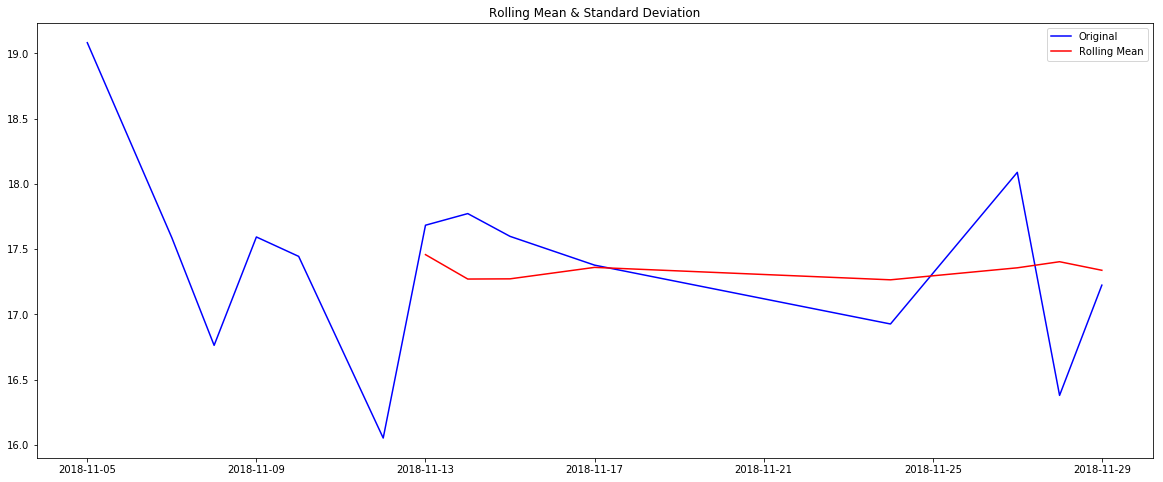

Results of Dickey-Fuller Test:
Test Statistic                -5.418205
p-value                        0.000003
#Lags Used                     5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [90]:
test_stationarity(sd_log_diff)

In [91]:
# # calculate weighted average
# expwighted_avg = sd_log.ewm(halflife=7).mean()
# plt.plot(sd_log_diff)
# plt.plot(expwighted_avg, color='red')

In [92]:
# sd_log_ewma_diff = sd_log - expwighted_avg
# test_stationarity(sd_log_ewma_diff)

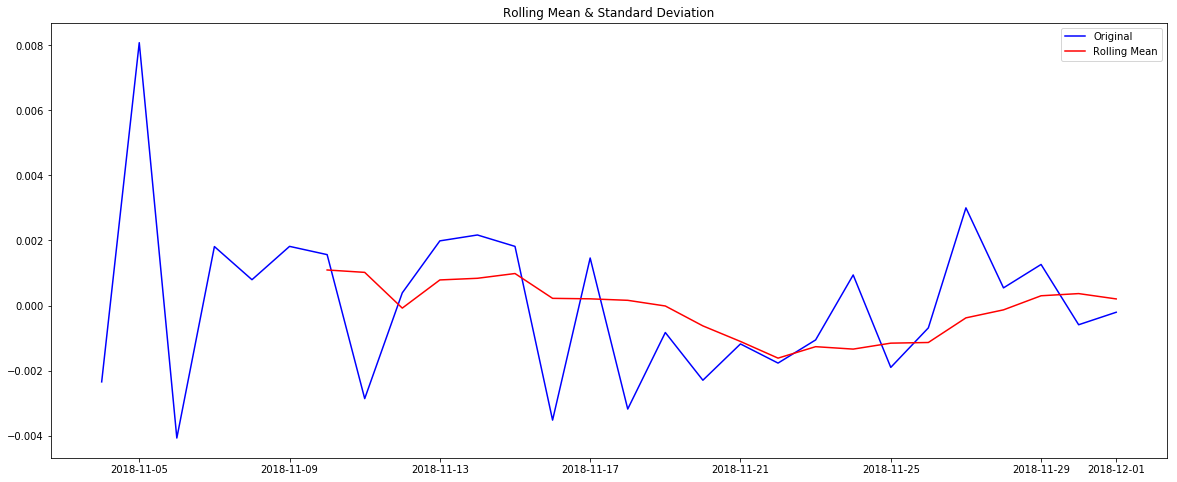

Results of Dickey-Fuller Test:
Test Statistic                -7.236222e+00
p-value                        1.936434e-10
#Lags Used                     0.000000e+00
Number of Observations Used    2.700000e+01
Critical Value (1%)           -3.699608e+00
Critical Value (5%)           -2.976430e+00
Critical Value (10%)          -2.627601e+00
dtype: float64


In [93]:
# differentiating a dataset with 1 and check statinarity
sd_log_diff1 = sd_log - sd_log.shift()
sd_log_diff1.dropna(inplace = True)
test_stationarity(sd_log_diff1)

Here p value is very less and critical value is also greater than test statistics so we can reject null hypothesis
and can conclude that the dataset is stationary

# Lets try another decomposition method to remove non stationarity

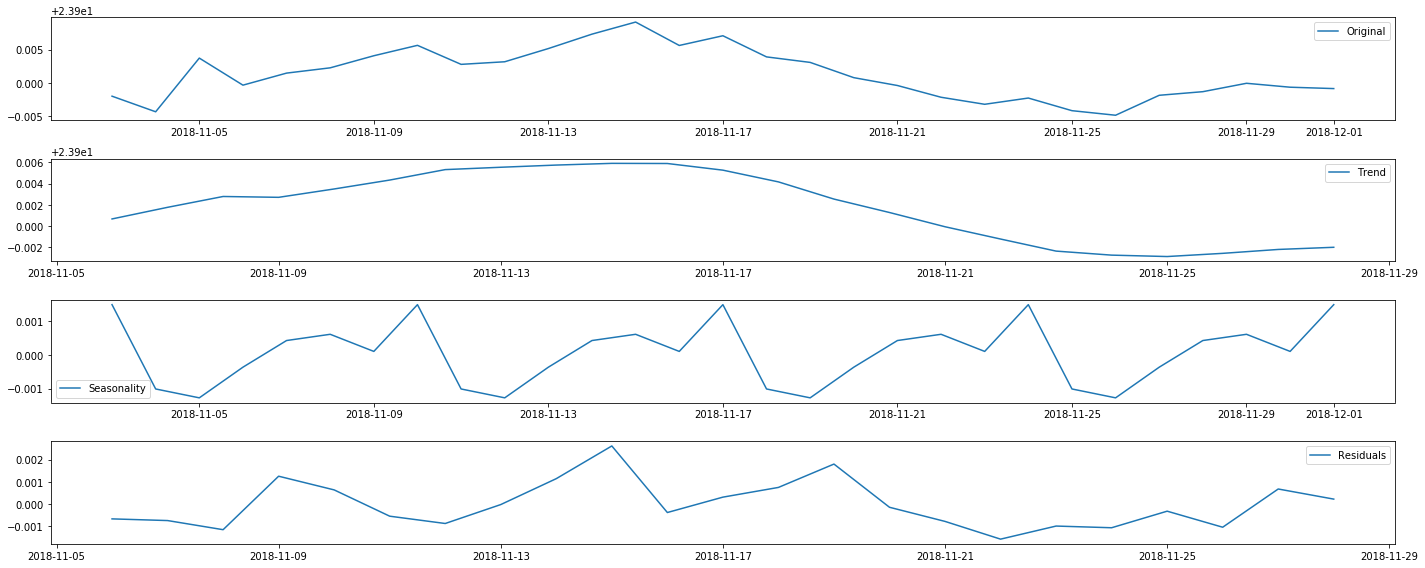

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sd_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sd_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


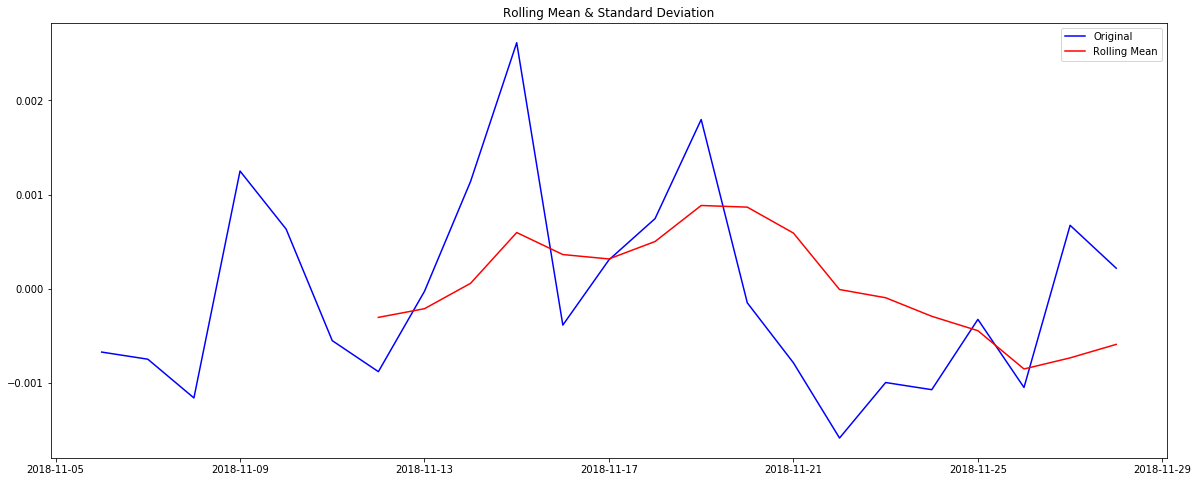

Results of Dickey-Fuller Test:
Test Statistic                 -1.690300
p-value                         0.436117
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [95]:
sd_log_decompose = residual
sd_log_decompose.dropna(inplace=True)
test_stationarity(sd_log_decompose)

The Dickey-Fuller test statistic is significantly higher than the 1% critical value. So this TS is not stationary

# Forecasting Time Series

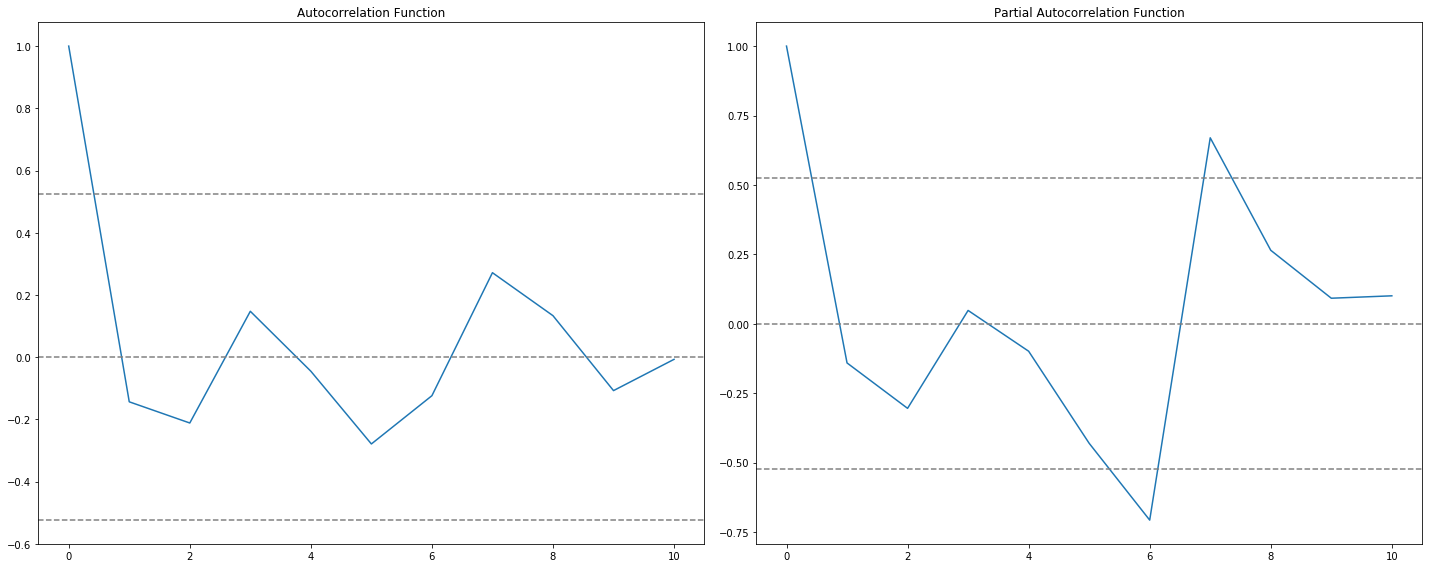

In [97]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(sd_log_diff, nlags=10)
lag_pacf = pacf(sd_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sd_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sd_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sd_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sd_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p = The lag value where the PACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case p=1.

q = The lag value where the ACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case q=1.

# AR MODEL

d:\python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


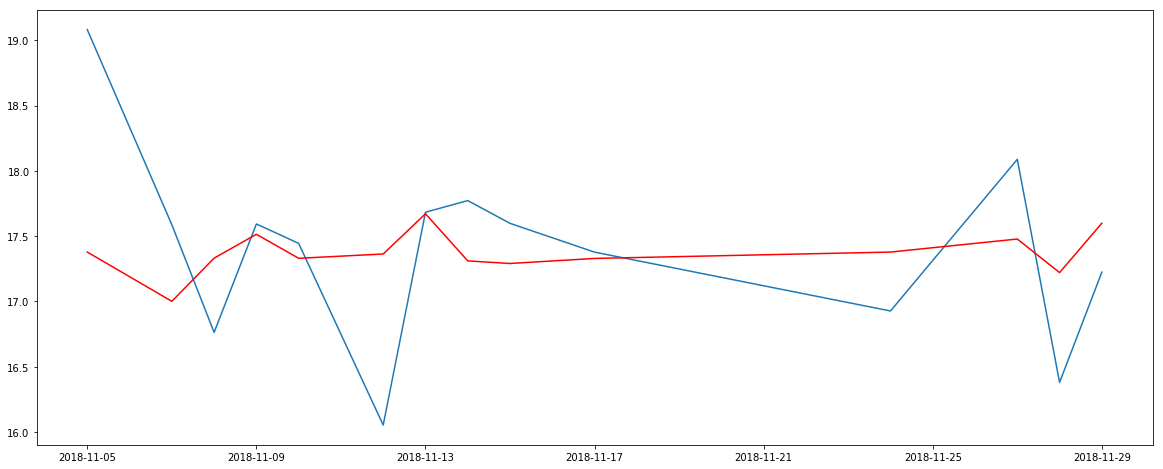

In [104]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sd_log_diff, order=(1, 0, 0))  #differentiate by 1 taking original value
results_AR = model.fit(disp=-1)  
plt.plot(sd_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-sd_log_diff1)**2))

# MA MODEL

d:\python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


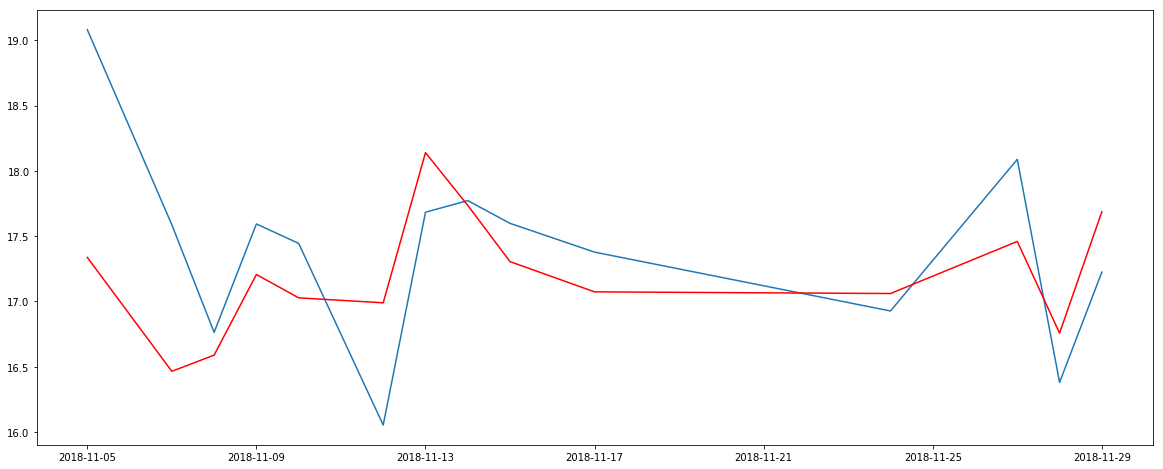

In [106]:
model = ARIMA(sd_log_diff, order=(0, 0, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(sd_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-sd_log_diff)**2))

# Combine Model i.e ARIMA MODEL

d:\python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

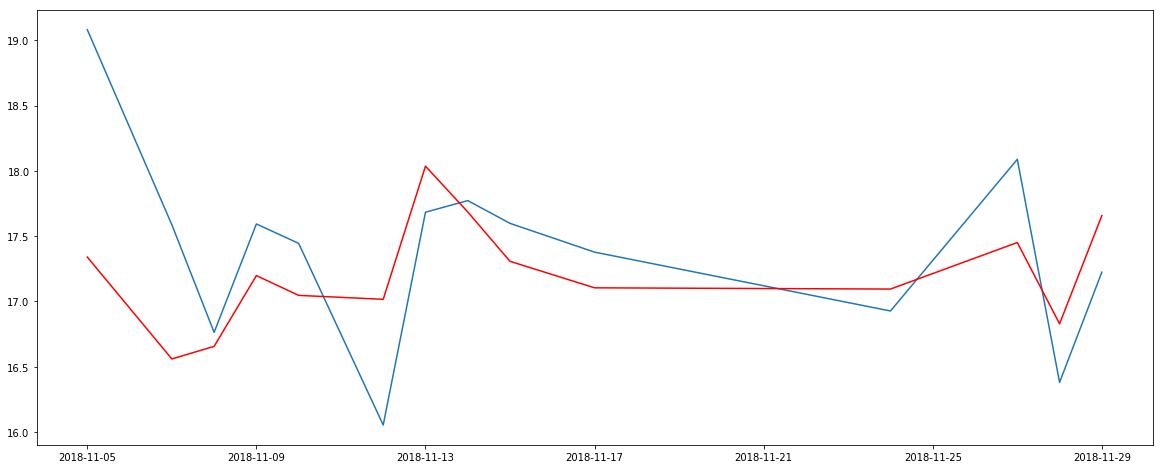

In [110]:
model = ARIMA(sd_log_diff, order=(1, 0, 1))  
results = model.fit(disp=-1)  
plt.plot(sd_log_diff)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-sd_log_diff)**2))